In [1]:
from numpy.random import seed
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5]

# 1
We create a fixed number of people. We assume this is a fixed population.

In [2]:
def mean(x):
    return np.sum(x)/len(x)

def var(x):
    return np.sum((x-mean(x))**2)/(len(x)-1)

def std(x):
    return np.sqrt(var(x))

pop. mean =  170.03909062679642 , real =  170
pop. var =  15.9627668615125 , real = 16
pop. std =  3.9953431469039677 , real = 4


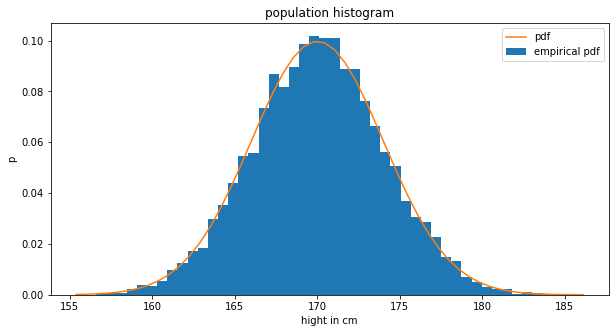

In [3]:
seed(1)
sigma = 4
mu = 170
N = norm(mu, sigma)

#create random samples
population = N.rvs(10000)

plt.title("population histogram")
plt.xlabel("hight in cm")
plt.ylabel("p")

#create histogram
b, edges, _ = plt.hist(population, bins = 50, density=True, label="empirical pdf")

x = np.linspace(min(edges), max(edges))
plt.plot(x, N.pdf(x), label="pdf")
plt.legend()

#ref real values
ref_pdf = {"mean": mu, "std": sigma, "var":sigma**2}

#ref pop. values
ref_pop = {"mean":mean(population), "var":var(population), "std":std(population)}


print("pop. mean = ", ref_pop["mean"], ", real = ", ref_pdf["mean"])
print("pop. var = ", ref_pop["var"], ", real =", ref_pdf["var"])
print("pop. std = ", ref_pop["std"], ", real =", ref_pdf["std"])

# 2
Unbiased and biased are properties of an RV not of an value. From the lecture, we know that the mean
$$ \bar{X} = \frac{1}{n}\sum^n_i X_i$$ 
and the variance are unbiased estimators
$$ S_X^2 = \text{var}[X] = \frac{1}{n-1} \sum^n_i (X_i - \bar{X})^2.$$
In the second exercise of this sheet we have proven that the standard deviation (std) is biased.

Please note altough the estimator is unbiased, and thus produces excactly the estimated quantity, this does not mean that arbitarly choosen x$_i$ = X$_i$($\omega_i$) produces excatly the estimated quantity. 

The following picture shows how the emperical mean, var and std (blue) are spreaded around the real expected value (red) for different subsets of the population. In addition, I added the mean of the essemble (yellow) which is just the mean of one value over all the different subsets. One clearly sees that the essemble mean and real value are really close but not the same. I also calculated the emperical mean, var and std of the population (pink) and one sees, that this matches pretty well with the essemble mean, because the yellow line obscures the pink one completely.

In [4]:
def create_hist(n_samples = 50, n_shuffles = 10000, rn = 0, functions = [mean, var, std]):
    """This function creates n_shuffles samples with size n_samples.
    For each sample it calculates the mean, var and str and returns it as a dataframe. """
    
    seed(rn)
    
    hist = pd.DataFrame()
    
    #get list with function names
    f_names = [i.__name__ for i in functions]
    
    #allocate memory
    for name in f_names:
        hist[name] = np.zeros(n_shuffles)

    for i in range(n_shuffles):
        #shuffle with replacement (iid condition)
        p = np.random.choice(population, size=n_samples)
        
        #caluclate for that population the mean, var and std
        for name, f in zip(f_names, functions):
            hist[name].iloc[i] = f(p)
        
    return hist

mean: pdf: 170, 		pop: 170.03909062679642		essemble: 170.03679308933945
var: pdf: 16, 		pop: 15.9627668615125		essemble: 15.957560242559572
std: pdf: 4, 		pop: 3.9953431469039677		essemble: 3.9741060411171834


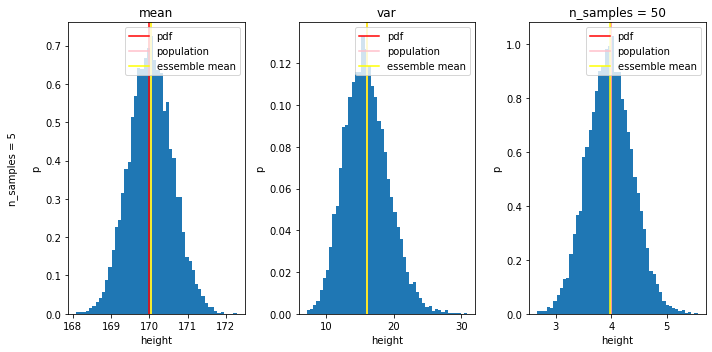

In [5]:
#create emperical mean, var and std for different n_shuffles = 1000 shuffles for a population of n_pop = 50 
hist = create_hist()

for j, i in enumerate(["mean", "var", "std"]):
    
    #create histogram
    plt.subplot(1,3,j+1)
    plt.hist(hist[i], density=True, bins=int(10000/200))
    
    plt.xlabel("height")
    if j == 0:
        plt.ylabel("n_samples = 5\n\np") 
    else:
        plt.ylabel("p")
    
    #calculate essemble (of samples) mean 
    essemble = np.mean(hist[i])
    
    #add referens values and essemble mean
    plt.axvline(x=ref_pdf[i], color="red", label = "pdf")
    plt.axvline(x=ref_pop[i], color="pink", label = "population")
    plt.axvline(x=essemble, color="yellow", label = "essemble mean")
    plt.title(i)
    plt.legend()
    
    #print values
    print("{}: pdf: {}, \t\tpop: {}\t\tessemble: {}".format(i, ref_pdf[i], ref_pop[i], essemble))

plt.title("n_samples = 50") 
plt.tight_layout()

It is intresting that the biased std matches also pretty well. If we change the size of the subset to be smaller this changes. Please notice how the distribution shape also changes a lot!

mean: pdf: 170, 		pop: 170.03909062679642		essemble: 170.05136027498995
var: pdf: 16, 		pop: 15.9627668615125		essemble: 15.988309397423475
std: pdf: 4, 		pop: 3.9953431469039677		essemble: 3.757124412600804


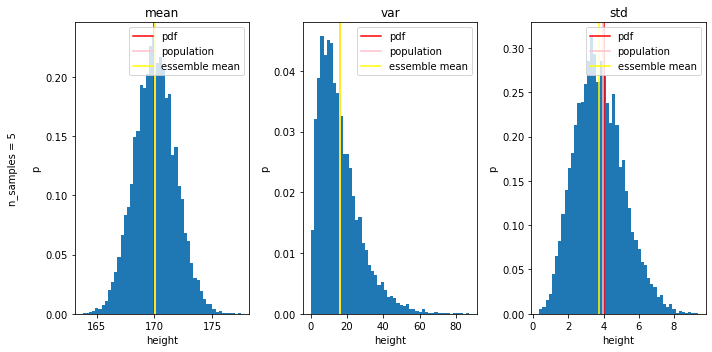

In [6]:
#create emperical mean, var and std for different n_shuffles = 1000 shuffles for a population of n_samples = 5
hist = create_hist(n_samples = 5)

for j, i in enumerate(["mean", "var", "std"]):
    
    #create histogram
    plt.subplot(1,3,j+1)
    plt.hist(hist[i], density=True, bins=int(1000/20))
    plt.xlabel("height")
    
    if j == 0:
        plt.ylabel("n_samples = 5\n\np") 
    else:
        plt.ylabel("p")
    
    #calculate essemble (of samples) mean 
    essemble = np.mean(hist[i])
    
    #add referens values and essemble mean
    plt.axvline(x=ref_pdf[i], color="red", label = "pdf")
    plt.axvline(x=ref_pop[i], color="pink", label = "population")
    plt.axvline(x=essemble, color="yellow", label = "essemble mean")
    plt.title(i)
    plt.legend()
    
    #print values
    print("{}: pdf: {}, \t\tpop: {}\t\tessemble: {}".format(i, ref_pdf[i], ref_pop[i], essemble))
    
plt.tight_layout()

# 3
Similar to exercise 2 in this exercise we would find different values for the median and the 31th order statistic depending on the population. But we assumed that it is fixed, thus we can directly calculate the values:

In [7]:
def med(set):
    n = len(set) 
    
    set = np.sort(set)
    
    if n%2 == 0:
        return 1/2*(set[n//2 - 1] + set[n // 2])
    else:
        return set[(n+1)//2 - 1]

def order_statistic(set, i):
    set = np.sort(set)
    return set[i+1]
    
def order_statistic_31(x): 
    return order_statistic(x, 31)
    

print("Median = ", med(population))
print("31th order statistic = ", order_statistic_31(population))

Median =  170.03381621638704
31th order statistic =  159.18402640923367


We can also calulate it for the sample size of 50 and get the following distributions:

In [8]:
hist = create_hist(functions=[med, order_statistic_31])

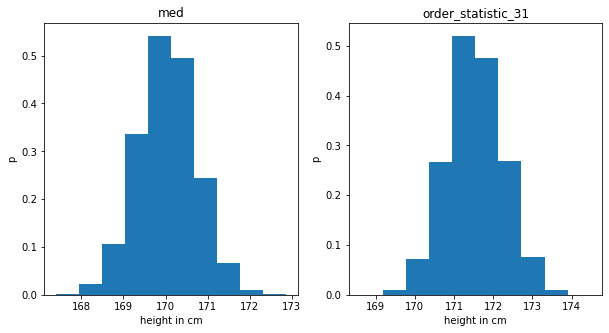

In [9]:
for j, i in enumerate(["med", "order_statistic_31"]):
    plt.subplot(1,2,j+1)
    plt.title(i)
    plt.xlabel("height in cm")
    
    
    hist[i].plot.hist(density=True)
    plt.ylabel("p")

# 4
In general, the truncated mean 

$$ trunc((x_1, x_2, ...), k) = \frac{1}{n-2k} \sum^{n-k}_{i=k+1} x_{(i)}$$

is only eqaule to the median if 

$$ k' = \begin{cases}
\frac{n}{2} - 1 &\text{ n$\in 2\mathbb{N}$}\\
\frac{n-1}{2} &\text{ else}.
\end{cases} $$

With k', the first equation becomes
$$ trunc((x_1, x_2, ...), k') = \begin{cases}
\frac{1}{2} \sum^{n/2+1}_{i = n/2} x_{(i)} &\text{ n$\in 2\mathbb{N}$}\\
\sum^{(n+1)/2}_{i = (n+1)/2} x_{(i)} &\text{ else}, \end{cases}$$
which is the definition of the median.

In a given example it can happen, that the median and truncated mean are eqaul in other places (see figure below, were the truncated mean fluctuates around the median).

Text(0, 0.5, 'height in cm')

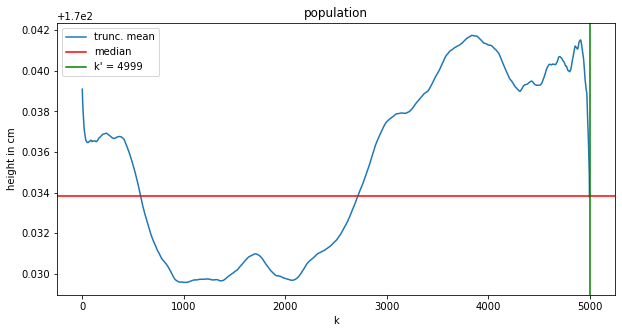

In [10]:
def truncated_mean(set, k, sort=True):
    n = len(set)
    if sort:
        set = np.sort(set)
    return 1/(n-2*k) * np.sum(set[k:n-k])

k_max = 5000

truncs = [truncated_mean(population, i)for i in range(k_max)]
plt.plot(truncs, label="trunc. mean")
plt.axhline(y = np.median(population), label="median", color = "red")
plt.axvline(x = k_max-1, label="k' = {}".format(k_max-1), color = "green")
plt.legend()
plt.title("population")
plt.xlabel("k")
plt.ylabel("height in cm")

In [11]:
# calculate truncated mean for different samples and ks
n_shuffles, n_samples = 1000, 50
ks = np.arange(0,25)

s = np.random.choice(population, size=(n_shuffles, n_samples))
s = np.sort(s, axis=1)

trunc_values = np.zeros((n_shuffles, len(ks)))

for i in range(n_shuffles):
    for j, k in enumerate(ks):
        trunc_values[i, j] = truncated_mean(s[i], k, sort=False)

In [12]:
bins = int(n_shuffles/30)
range_ = (170-4, 170+4)
b = np.zeros((len(ks), (bins)))
r = np.zeros(((bins)))

#create histogram for each sample
for i in range(len(ks)):
    b_, r_ = np.histogram(trunc_values[:,i], bins=bins,  density=True,range=range_)
    b[i] = b_
    r = (r_[:-1] + r_[1:])/2

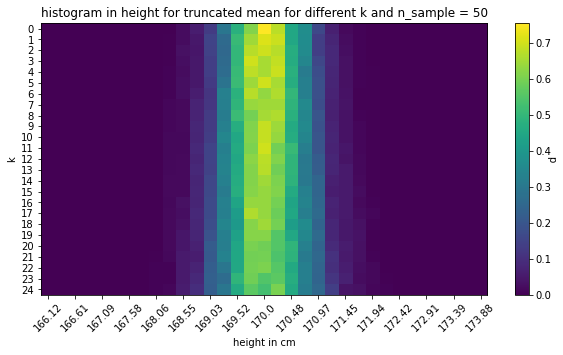

In [13]:
#plot histogram schar
plt.imshow(b, aspect='auto')
plt.yticks(np.arange(len(ks)),ks)
plt.xticks(np.arange(len(r))[::2], np.round(r[::2], 2), rotation=45)

plt.title("histogram in height for truncated mean for different k and n_sample = 50")
plt.ylabel("k")
plt.xlabel("height in cm")

cbar = plt.colorbar()
cbar.set_label('p', rotation=270)

plt.show()